In [18]:
import pandas as pd

dataChurn = pd.read_csv('./Dataset/Data_Churn.csv')
dataChurn.head()

,Tenure,CityTier,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderCount,DaySinceLastOrder,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn
0,0.505320,3.0,0.0,3.0,3.0,2.0,0.882436,1.0,1.0,0.709492,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,0.318331,1.0,1.0,3.0,4.0,3.0,0.745871,1.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.318331,1.0,1.0,2.0,4.0,3.0,0.667593,1.0,1.0,0.598408,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.000000,3.0,1.0,2.0,4.0,5.0,0.817007,0.0,1.0,0.598408,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.000000,1.0,1.0,2.0,3.0,5.0,0.361321,0.0,1.0,0.598408,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


## Split Data

In [19]:
from sklearn.model_selection import train_test_split

X = dataChurn[dataChurn.columns[:-1]]
y = dataChurn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Fungsi Evaluasi & Visualisasi

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def evaluasi(model, x_train, y_train, x_test, y_test) :
    prediksi_train = model.predict(x_train)
    prediksi_test = model.predict(x_test)
    print('Akurasi data latih = {}'.format(accuracy_score(y_train, prediksi_train)))
    print('Akurasi presisi data latih = {}'.format(precision_score(y_train, prediksi_train)))
    print('Akurasi recall data latih = {}'.format(recall_score(y_train, prediksi_train)))
    print("================================================")
    print('Akurasi data uji = {}'.format(accuracy_score(y_test, prediksi_test)))
    print('Akurasi presisi data uji = {}'.format(precision_score(y_test, prediksi_test)))
    print('Akurasi recall data uji = {}'.format(recall_score(y_test, prediksi_test)))
    print("================================================")
    print('Akurasi recall data uji = {}'.format(roc_auc_score(y_test, prediksi_test)))

In [21]:
import matplotlib.pyplot as plt

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

In [22]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Membuat hyperparameter
hyperparameters = dict(
    n_neighbors = list(range(1, 1000)),
    weights = ['uniform', 'distance'],
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'],
    p = [1, 2],
)

# Membuat model
knn_model = RandomizedSearchCV(KNeighborsClassifier(), hyperparameters, random_state=42, cv=5, scoring='recall')

# Latih data
knn_model.fit(X_train, y_train)

# Evaluasi model
evaluasi(knn_model, X_train, y_train, X_test, y_test)
print('\n')
show_best_hyperparameter(knn_model.best_estimator_, hyperparameters)

Akurasi data latih = 1.0
Akurasi presisi data latih = 1.0
Akurasi recall data latih = 1.0
Akurasi data uji = 0.9215406562054208
Akurasi presisi data uji = 0.8712011577424024
Akurasi recall data uji = 0.9662921348314607
Akurasi recall data uji = 0.9260215488021232


Best n_neighbors: 568
Best weights: distance
Best algorithm: ball_tree
Best p: 1


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Membuat Hyperparameter
hyperparameters = dict(
    criterion = ['gini', 'entropy'],
    splitter = ['best', 'random'],
    max_depth = list(range(1, 2000)),
    max_features = ['auto', 'sqrt', 'log2'],   
)

# Membuat model
decision_model = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), hyperparameters, random_state=42, cv=5, scoring='recall')

# Latih data
decision_model.fit(X_train, y_train)

# Evaluasi model
evaluasi(decision_model, X_train, y_train, X_test, y_test)
print('\n')
show_best_hyperparameter(decision_model.best_estimator_, hyperparameters)

Akurasi data latih = 1.0
Akurasi presisi data latih = 1.0
Akurasi recall data latih = 1.0
Akurasi data uji = 0.927960057061341
Akurasi presisi data uji = 0.8793604651162791
Akurasi recall data uji = 0.971107544141252
Akurasi recall data uji = 0.9322803445995091


Best criterion: gini
Best splitter: best
Best max_depth: 144
Best max_features: sqrt


## Random Forest

Akurasi data latih = 0.8577546650351789
Akurasi presisi data latih = 0.8174807197943444
Akurasi recall data latih = 0.8754301445285616
Akurasi data uji = 0.8416547788873039
Akurasi presisi data uji = 0.8177496038034865
Akurasi recall data uji = 0.8282504012841091
Akurasi recall data uji = 0.8403126204109892




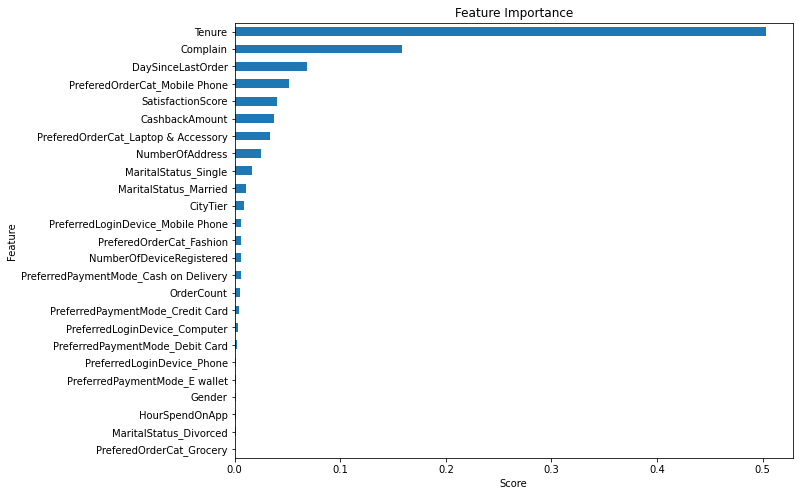

In [25]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Membuat Hyperparameter
hyperparameters = dict(
    n_estimators = [int(x) for x in np.linspace(1, 1000, num=20)],
    criterion = ['gini', 'entropy'],
    max_depth = [int(x) for x in np.linspace(1, 1000, num=20)],
    min_samples_split = [int(x) for x in np.linspace(10, 500, num=20)],
    min_samples_leaf = [int(x) for x in np.linspace(10, 500, num=20)],
    max_features = ['auto', 'sqrt', 'log2'],
    bootstrap = [True, False],
    class_weight = ['balanced', 'balanced_subsample'],
)

# Membuat model
randomForest_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), hyperparameters, cv=5, random_state=42, scoring='recall')

# Latih data
randomForest_model.fit(X_train, y_train)

# Evaluasi model
evaluasi(randomForest_model, X_train, y_train, X_test, y_test)
print('\n')
show_feature_importance(randomForest_model.best_estimator_)

## Adaboost

Akurasi data latih = 0.8647904557968797
Akurasi presisi data latih = 0.8431771894093686
Akurasi recall data latih = 0.8547832071576049
Akurasi data uji = 0.8373751783166904
Akurasi presisi data uji = 0.8422876949740035
Akurasi recall data uji = 0.7800963081861958
Akurasi recall data uji = 0.8316399384319939


Best n_estimators: 842
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R




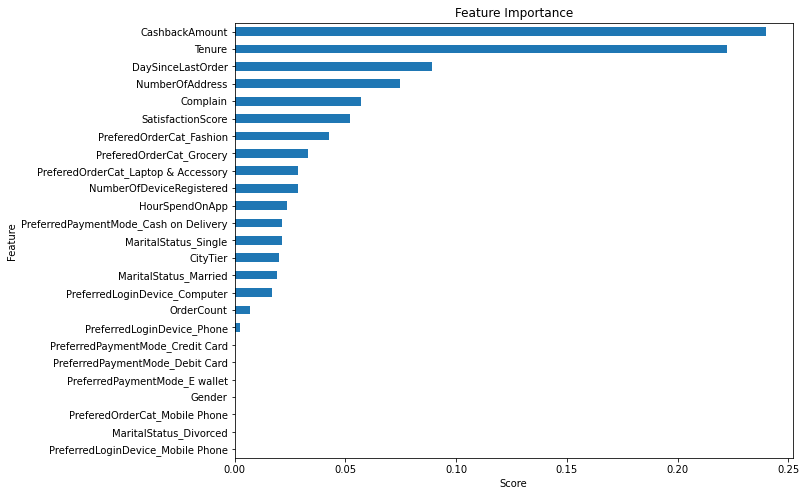

In [26]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter
hyperparameters = dict(
    n_estimators = [int(x) for x in np.linspace(1, 1000, num=20)],
    learning_rate = [float(x) for x in np.linspace(0.001, 0.1, num=20)],  
    algorithm = ['SAMME', 'SAMME.R']
)

# Membuat model
adaboost_model = RandomizedSearchCV(AdaBoostClassifier(random_state=42), hyperparameters, cv=5, random_state=42, scoring='recall')

# Latih data
adaboost_model.fit(X_train, y_train)

# Evaluasi model
evaluasi(adaboost_model, X_train, y_train, X_test, y_test)
print('\n')
show_best_hyperparameter(adaboost_model.best_estimator_, hyperparameters)
print('\n')
show_feature_importance(adaboost_model.best_estimator_)

## XGBoost

Akurasi data latih = 0.9461609054756807
Akurasi presisi data latih = 0.9242524916943522
Akurasi recall data latih = 0.9573296627666896
Akurasi data uji = 0.9165477888730386
Akurasi presisi data uji = 0.905448717948718
Akurasi recall data uji = 0.9069020866773676
Akurasi recall data uji = 0.9155819804375285


Best max_depth: 334
Best min_child_weight: 39
Best gamma: 0.1111111111111111
Best tree_method: auto
Best colsample_bytree: 1.0
Best eta: 0.888888888888889
Best lambda: 0.4444444444444444
Best alpha: 0.8888888888888888




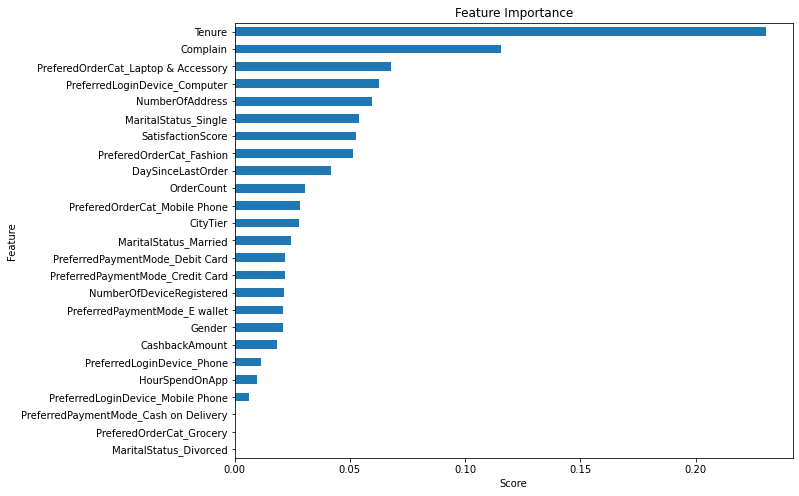

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter
hyperparameters = {
    'max_depth' : [int(x) for x in np.linspace(1, 1000, num=10)],
    'min_child_weight' : [int(x) for x in np.linspace(1, 50, num=10)],
    'gamma' : [float(x) for x in np.linspace(0, 1, num=10)],
    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num=10)],
    'eta' : [float(x) for x in np.linspace(0, 1, num=100)],
    'lambda' : [float(x) for x in np.linspace(0, 1, num=10)],
    'alpha' : [float(x) for x in np.linspace(0, 1, num=10)]
}

# Membuat model
xgboost_model = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), hyperparameters, cv=5, random_state=42, scoring='recall')

# Latih data
xgboost_model.fit(X_train, y_train)

# Evaluasi model
evaluasi(xgboost_model, X_train, y_train, X_test, y_test)
print('\n')
show_best_hyperparameter(xgboost_model.best_estimator_, hyperparameters)
print('\n')
show_feature_importance(xgboost_model.best_estimator_)